# Exploratory Data Analysis of Customer Churn Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data into Dataframe

In [2]:
idf= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
idf.head()                                             #Displaying the first five rows.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###### Checking data types 

In [3]:
idf.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Analysing the target variable

(array([5174., 1869.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

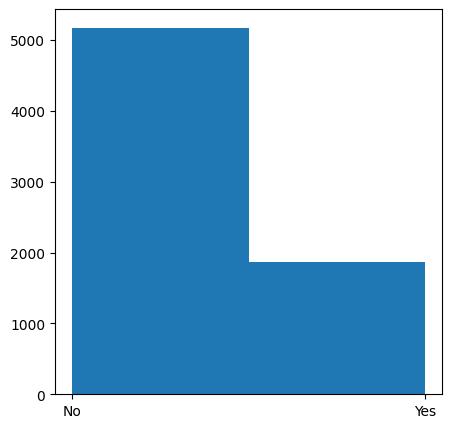

In [4]:
fig= plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
ax.hist(idf["Churn"], bins=2)

In [5]:
idf["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We can see there is quiet imbalance between the churners and nonchurners.
So, we analyse the data with other features while taking the largest values seperately to get some insights.

## Dropping irrelevant columns 

In [6]:
df=idf.drop("customerID", axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.shape

(7043, 20)

In [8]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df2=df.copy()
df2.TotalCharges= pd.to_numeric(df2.TotalCharges, errors= 'coerce')
df2.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

###### Removing null values 

In [10]:
df2.dropna(how='any', inplace=True)                      #null values can be dropped as they are less in number
df2.shape

(7032, 20)

# Detecting outliers

<AxesSubplot: xlabel='MonthlyCharges'>

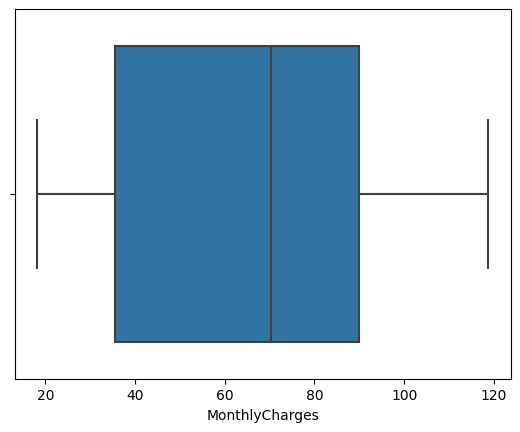

In [11]:
sns.boxplot(x=df2["MonthlyCharges"])

<AxesSubplot: xlabel='TotalCharges'>

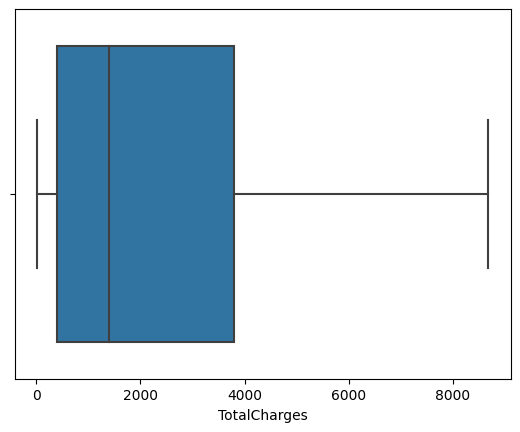

In [12]:
sns.boxplot(x=df2["TotalCharges"])

In [13]:
df2[["MonthlyCharges","TotalCharges"]].describe()

,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000
mean,64.798208,2283.300441
std,30.085974,2266.771362
min,18.250000,18.800000
25%,35.587500,401.450000
50%,70.350000,1397.475000
75%,89.862500,3794.737500
max,118.750000,8684.800000


There are no outliers in this data.

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


###### Making the tenure groups 

Creating tenure groups gives better insights of the data.

In [15]:
print(df2.tenure.max())

72


In [16]:
labels= ['{0} - {1}'.format(i, i+11) for i in range(1,72,12)]
df2['tenure_group']= pd.cut(df2.tenure, range(1, 80, 12), right= False, labels=labels)

In [17]:
df2['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [18]:
df2=df2.drop("tenure", axis=1)

In [19]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

# Univariate Analysis

<AxesSubplot: xlabel='gender', ylabel='count'>

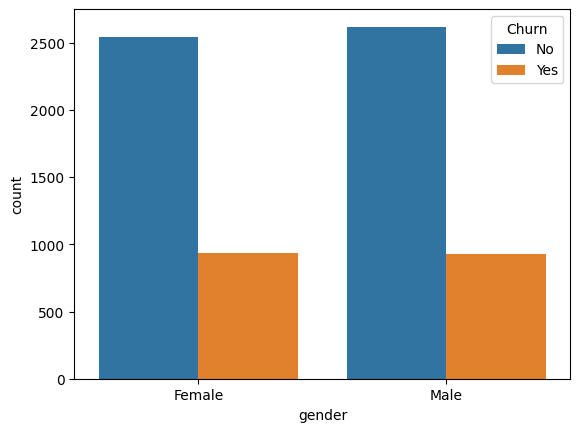

In [20]:
sns.countplot(data=df2, x= 'gender' , hue= "Churn")

We observe that gender stand alone does not play any significant roles in order to give insights.

<AxesSubplot: xlabel='SeniorCitizen', ylabel='count'>

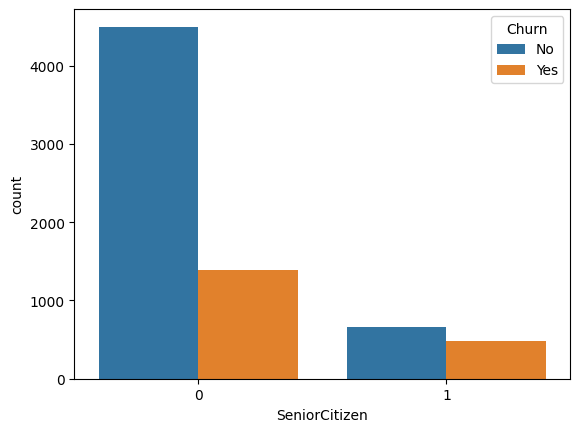

In [21]:
sns.countplot(data=df2, x= 'SeniorCitizen' , hue= "Churn")

The number of non-senior citizens is more in given data. But, the ratio of churners to non-churners is more in senior citizens.

<AxesSubplot: xlabel='Contract', ylabel='count'>

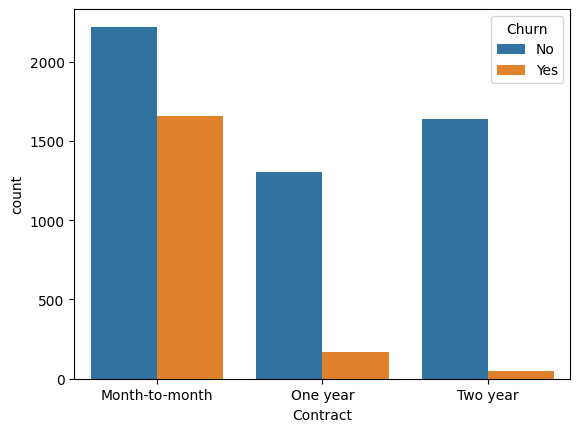

In [22]:
sns.countplot(data=df2, x= 'Contract' , hue= "Churn")

Two year contract people are the least churners.

<AxesSubplot: xlabel='PaymentMethod', ylabel='count'>

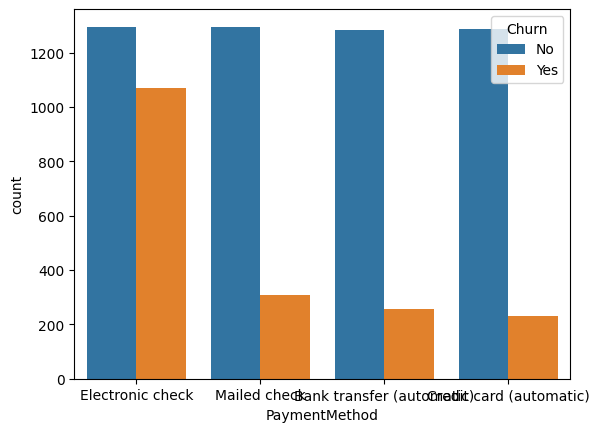

In [23]:
sns.countplot(data=df2, x= 'PaymentMethod' , hue= "Churn")

It is observed that non churners use all of 4 payment method equally. Whereas, most preferable payment method of churners is electronic check.

<AxesSubplot: xlabel='tenure_group', ylabel='count'>

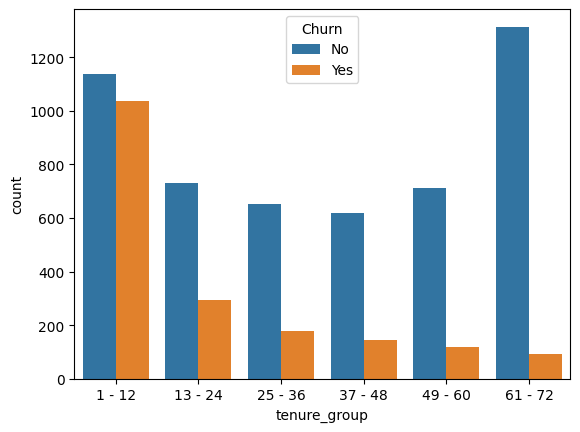

In [24]:
sns.countplot(data=df2, x= 'tenure_group' , hue= "Churn")

The ratio of churners to non churners is highest in case of tenure group 1-12 months. It is lowest in case of tenure group 61-72.

In [25]:
df2.Churn= df2.Churn.replace({"No": 0, "Yes": 1})
df2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [26]:
df2_dummies= pd.get_dummies(df2)
df2_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [27]:
df2_dummies=df2_dummies.drop(["gender_Female","Partner_No","Dependents_No","PaymentMethod_Bank transfer (automatic)","tenure_group_1 - 12"],axis=1)

In [28]:
df2_dummies.shape

(7032, 46)

Text(0.5, 1.0, 'Monthly charges by Churn')

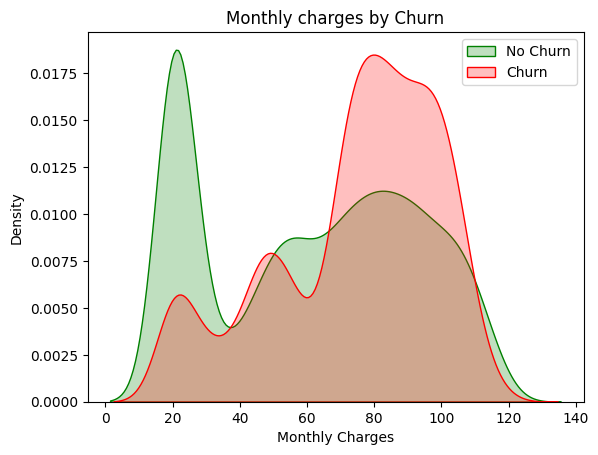

In [29]:
Mon= sns.kdeplot(df2_dummies.MonthlyCharges[(df2_dummies["Churn"]==0)], color="Green",fill= True)
Mon= sns.kdeplot(df2_dummies.MonthlyCharges[(df2_dummies["Churn"]==1)], color="Red",fill= True)
Mon.legend(["No Churn", "Churn"], loc='upper right')
Mon.set_xlabel("Monthly Charges")
Mon.set_ylabel("Density")
Mon.set_title("Monthly charges by Churn")

Churn is high when monthly charges are high.

###### Correlation 

<AxesSubplot: >

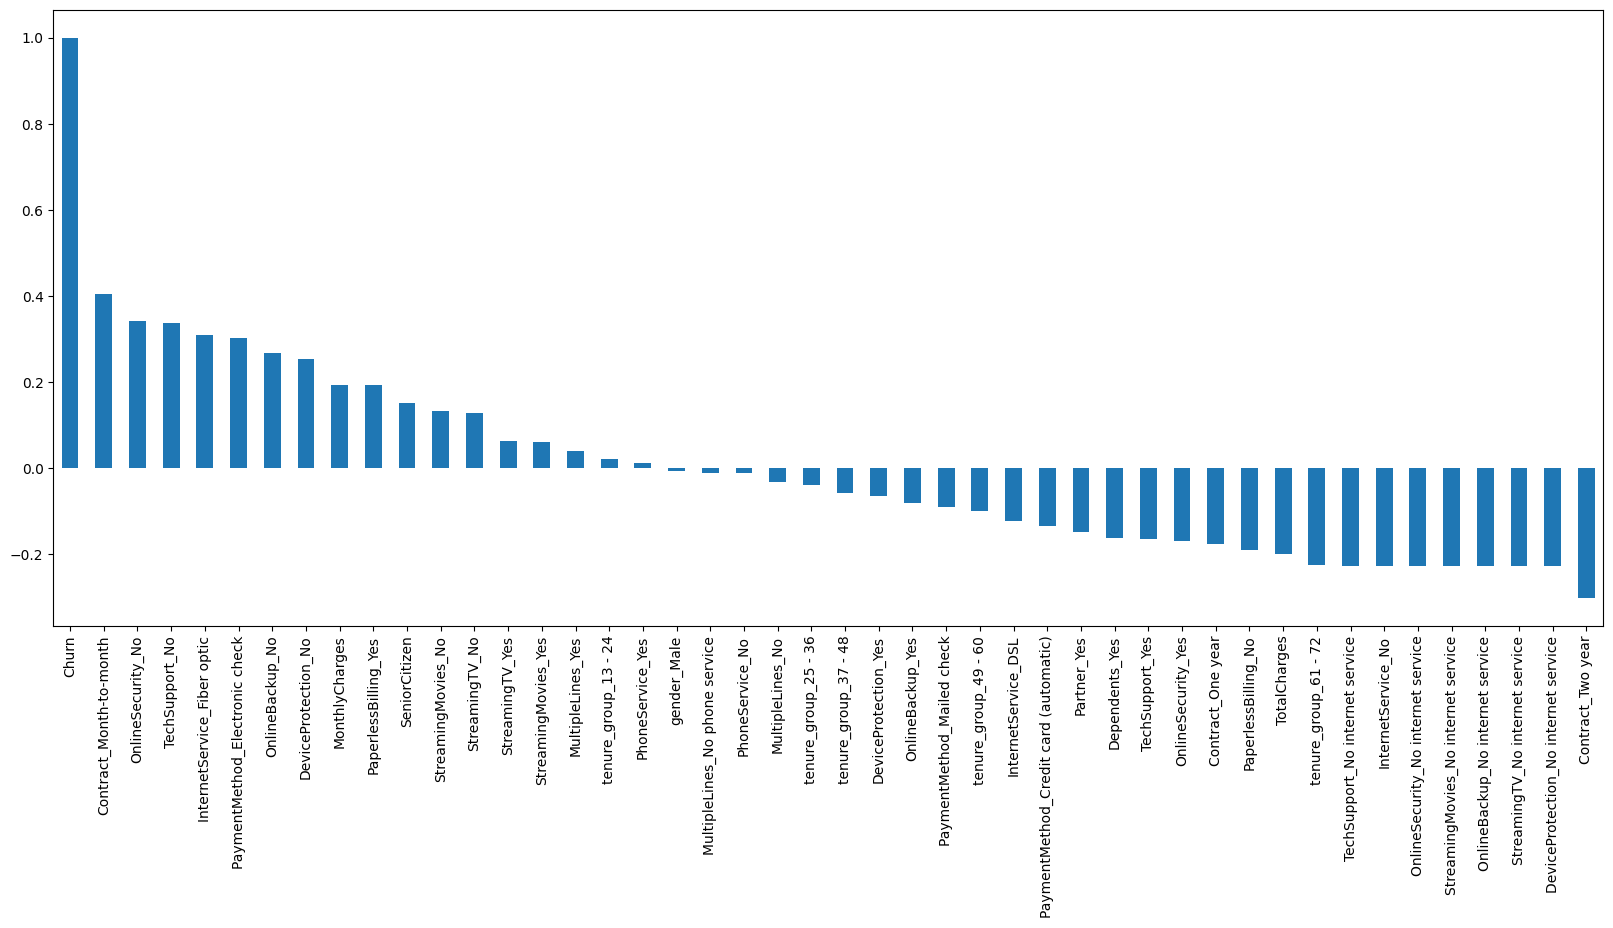

In [30]:
plt.figure(figsize=(20,8))
df2_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot: >

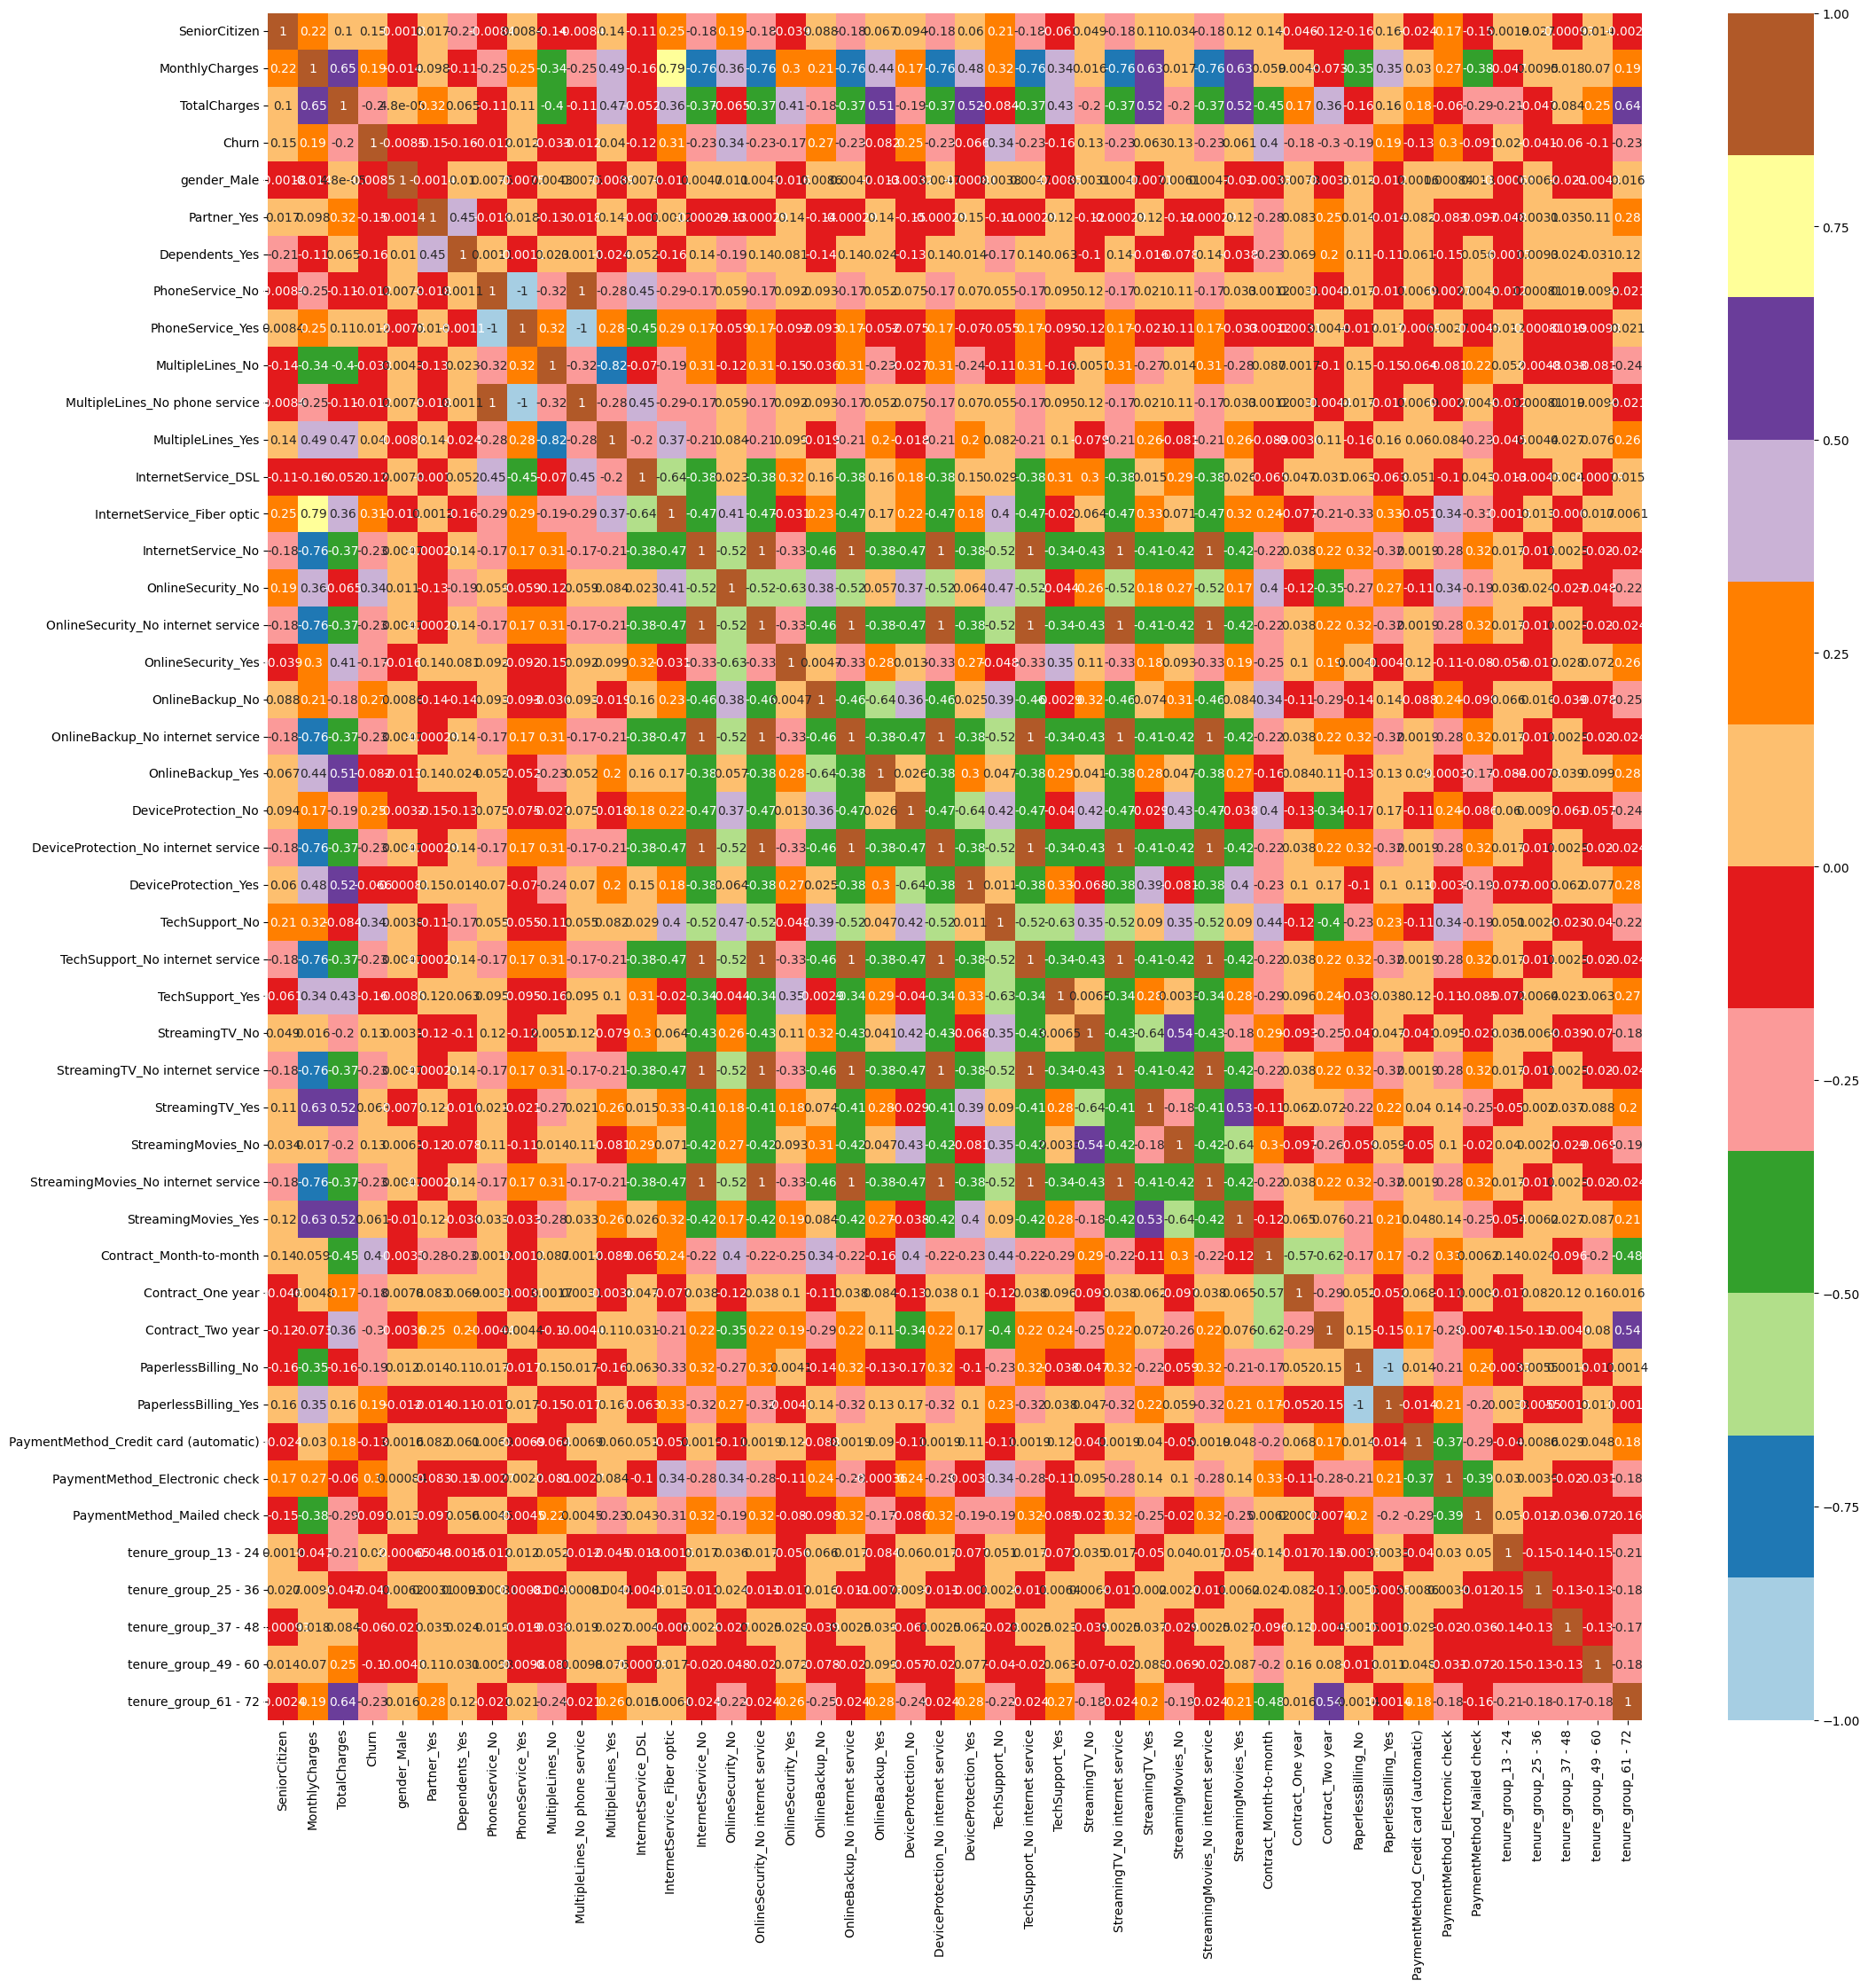

In [31]:
plt.figure(figsize=(25,25))
sns.heatmap(df2_dummies.corr(), cmap="Paired", annot= True)

Text(0.5, 0, 'Monthly Charges')

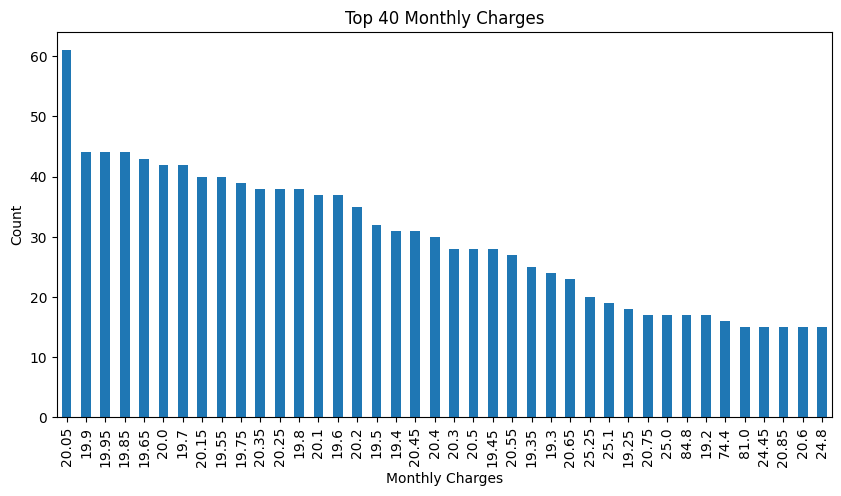

In [32]:
df2.MonthlyCharges.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Top 40 Monthly Charges")
plt.ylabel('Count')
plt.xlabel('Monthly Charges')

# Bivariate Analysis

## Scatterplot

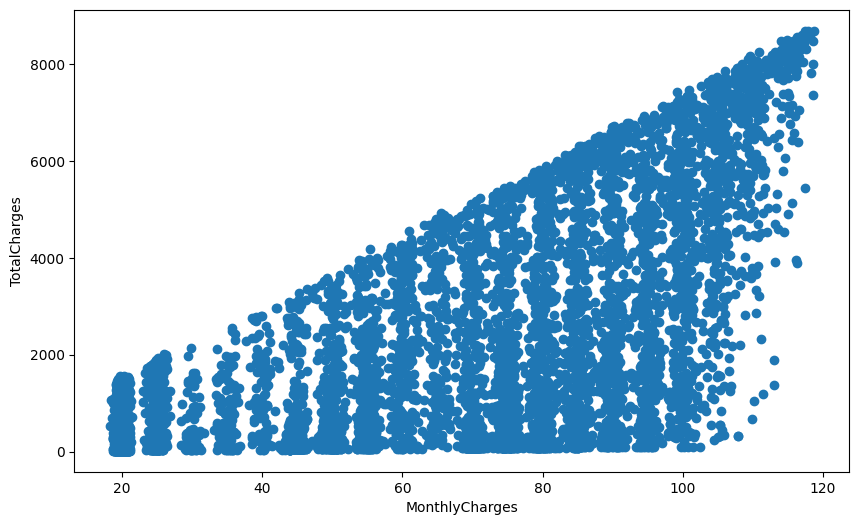

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df2['MonthlyCharges'], df2['TotalCharges'])
ax.set_xlabel('MonthlyCharges')
ax.set_ylabel('TotalCharges')
plt.show()

As monthly charges increases total charges also increase.

In [34]:
y0=df2.loc[df2["Churn"]==0]
y1=df2.loc[df2["Churn"]==1]

In [35]:
def uniplot(df,col,title,hue=None):

    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30
    
    temp=pd.Series(data=hue)
    fig,ax= plt.subplots()
    width= len(df[col].unique()) + 7 +4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

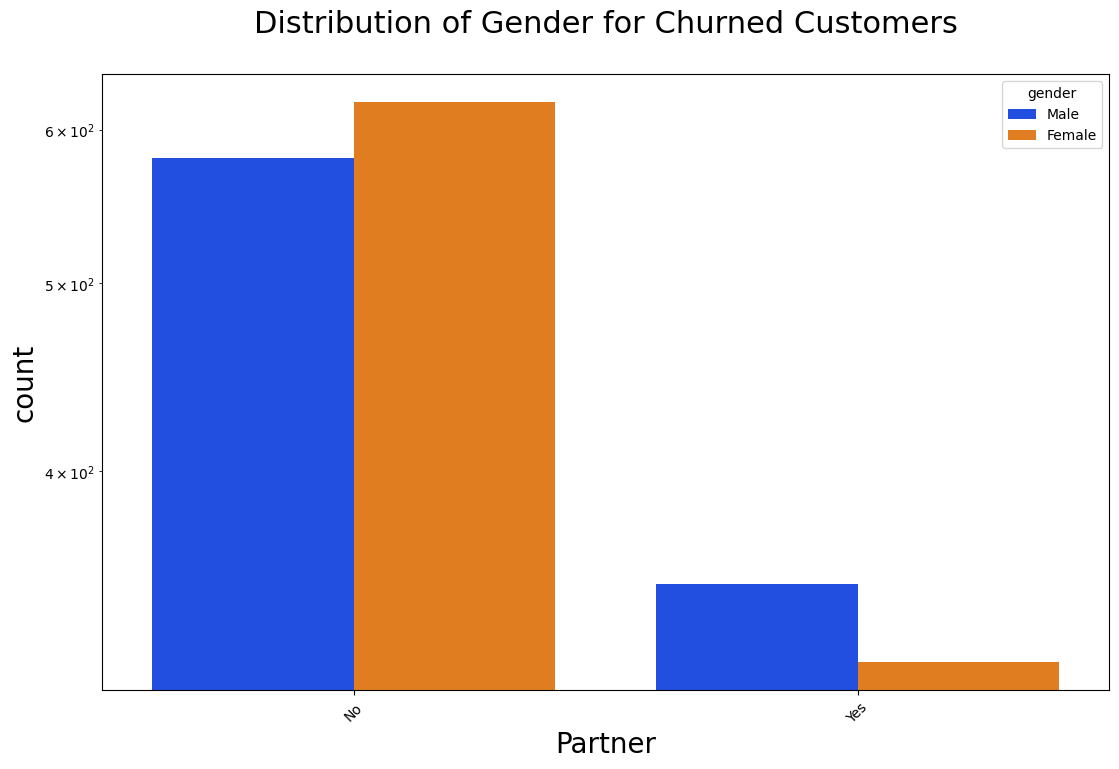

In [36]:
uniplot(y1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

In case of no partners, number of female churners is more. Whereas, in the opposite case number of male churners is more.

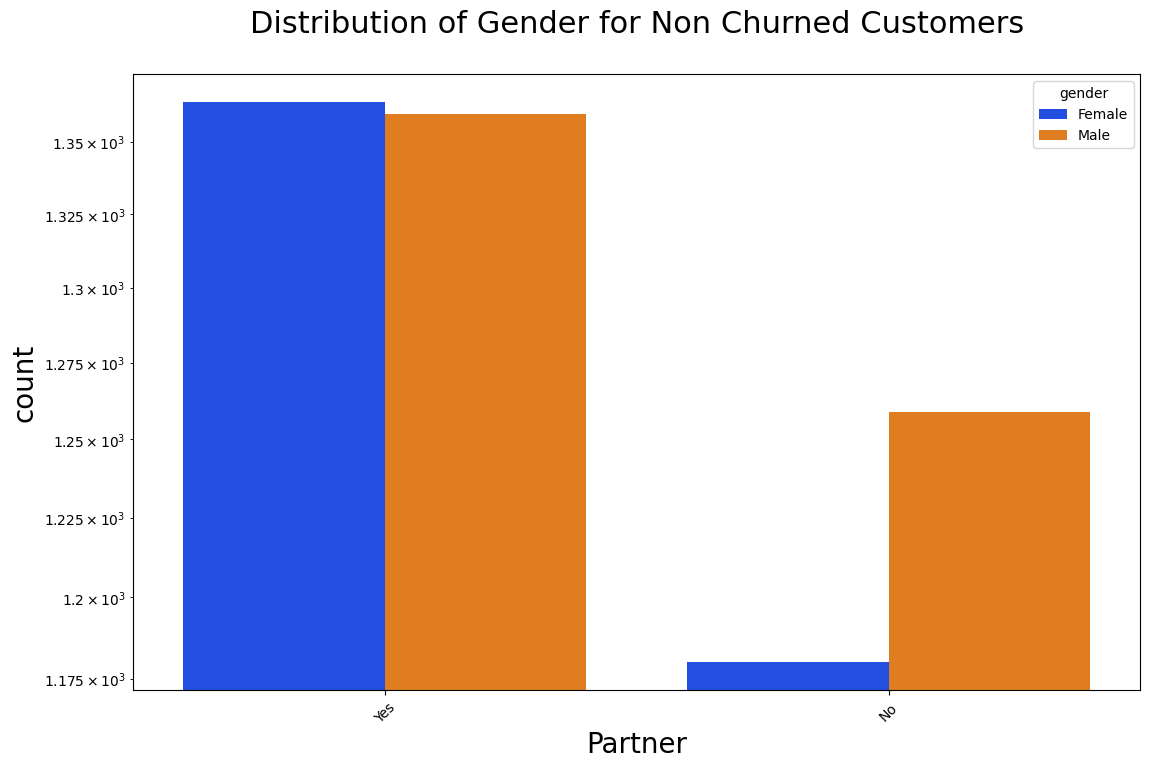

In [37]:
uniplot(y0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

The number of male & female nonchurners is almost same in case of partners. In case of no partners, number of female nonchurners is less compared to male.

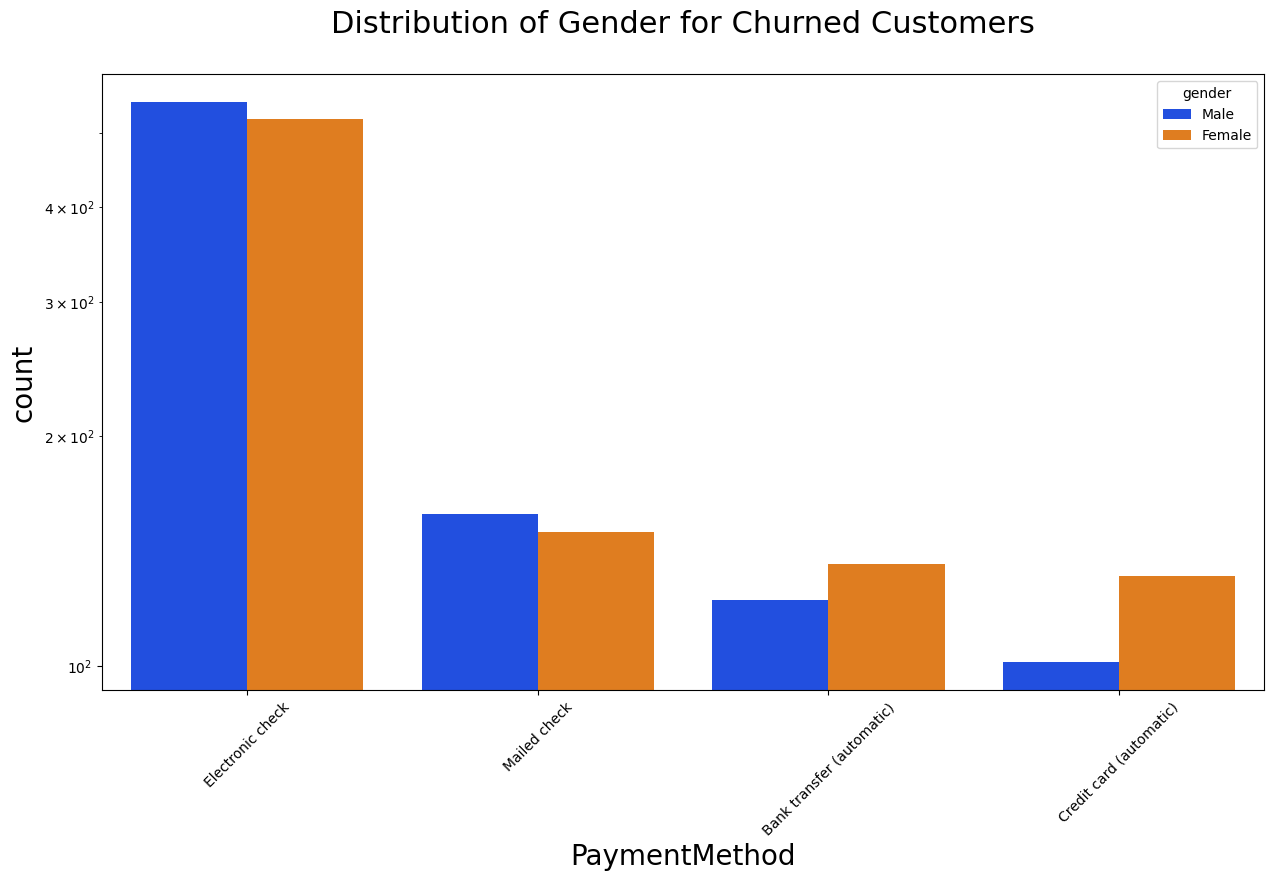

In [38]:
uniplot(y1,col='PaymentMethod',title='Distribution of Gender for Churned Customers',hue='gender')

Number of Churners is highest in case of electronic check, with almost equal number of male and female churners. Male churners are more compared to female in case of Electronic check & Mailed check. But, are less compared to female churners in case of Bank transfer & Credit card.

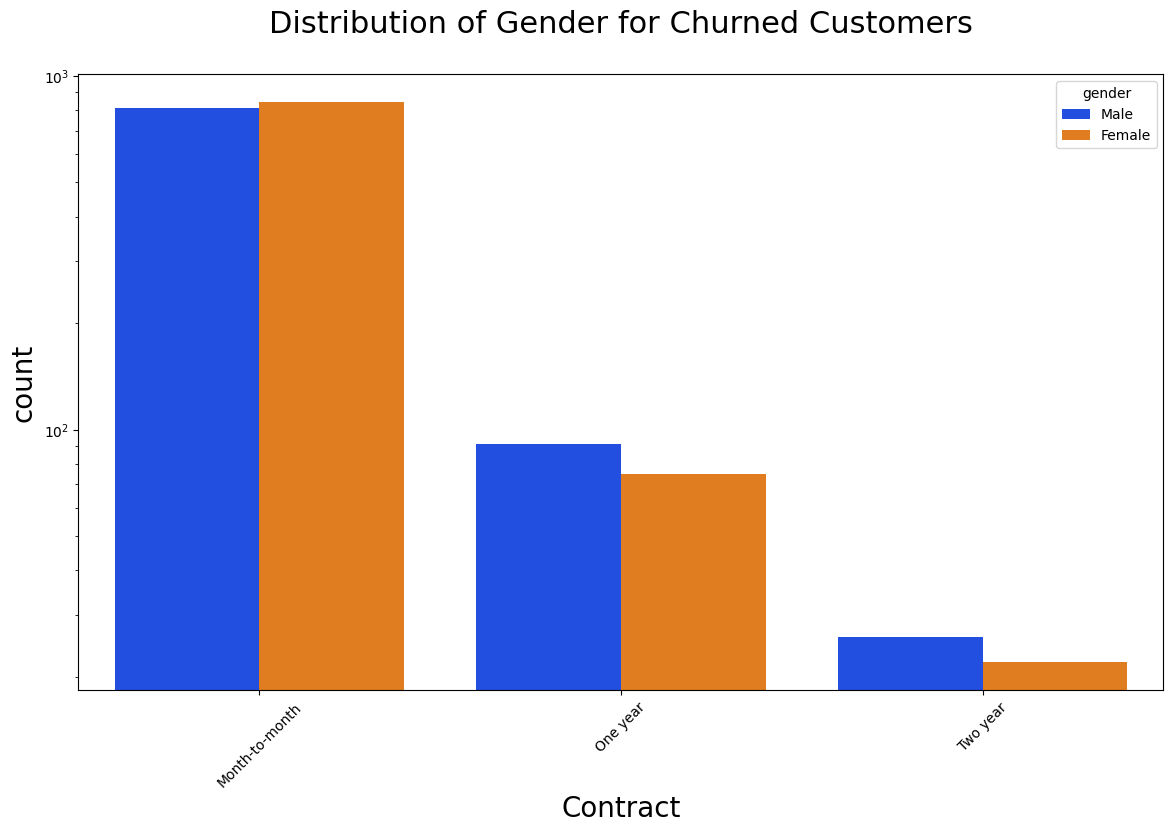

In [39]:
uniplot(y1,col='Contract',title='Distribution of Gender for Churned Customers',hue='gender')

Number of churners is most in case of month-to-month contract people.

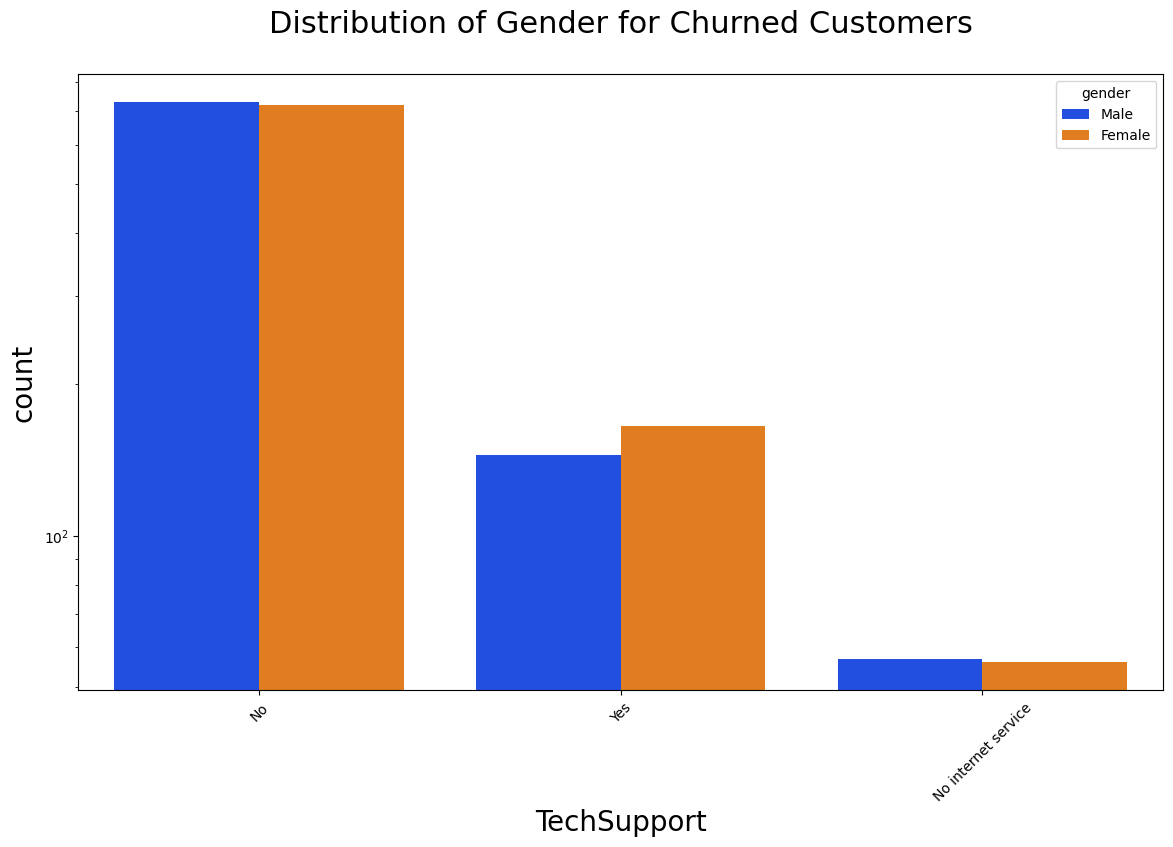

In [40]:
uniplot(y1,col='TechSupport',title='Distribution of Gender for Churned Customers',hue='gender')

The number of churners is more in case of no TechSupport.

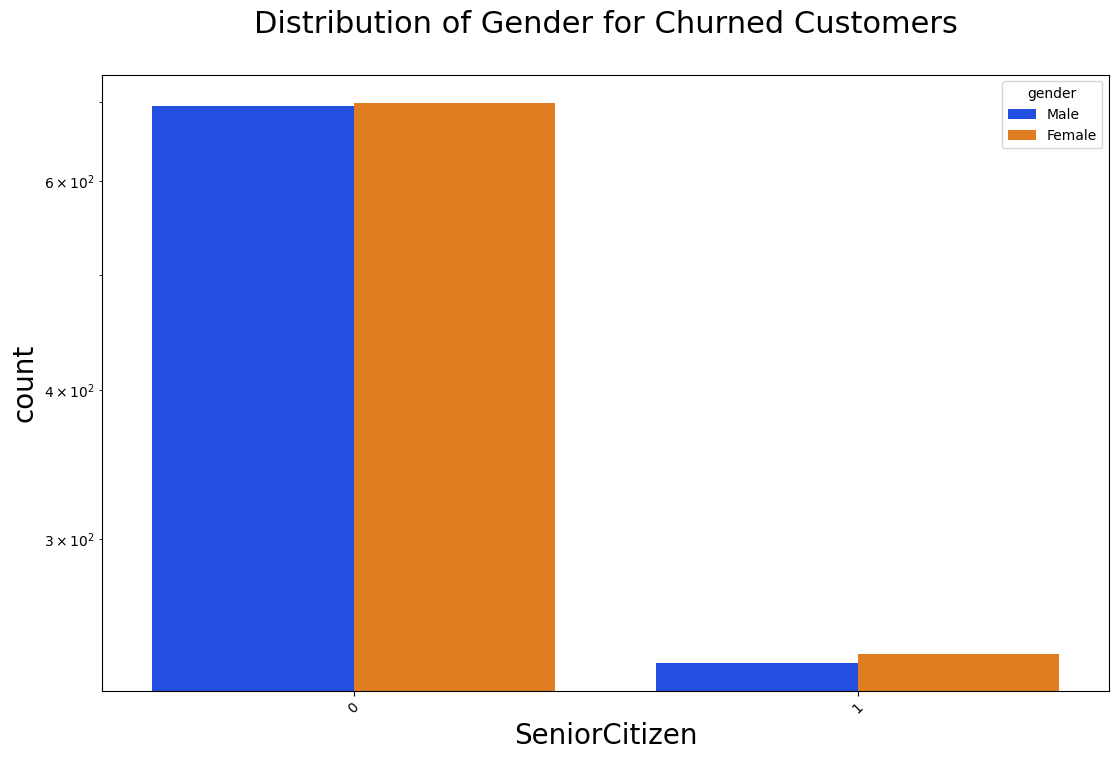

In [41]:
uniplot(y1,col='SeniorCitizen',title='Distribution of Gender for Churned Customers',hue='gender')

Senior citizens number of churners is less compared to non-senior citizens.

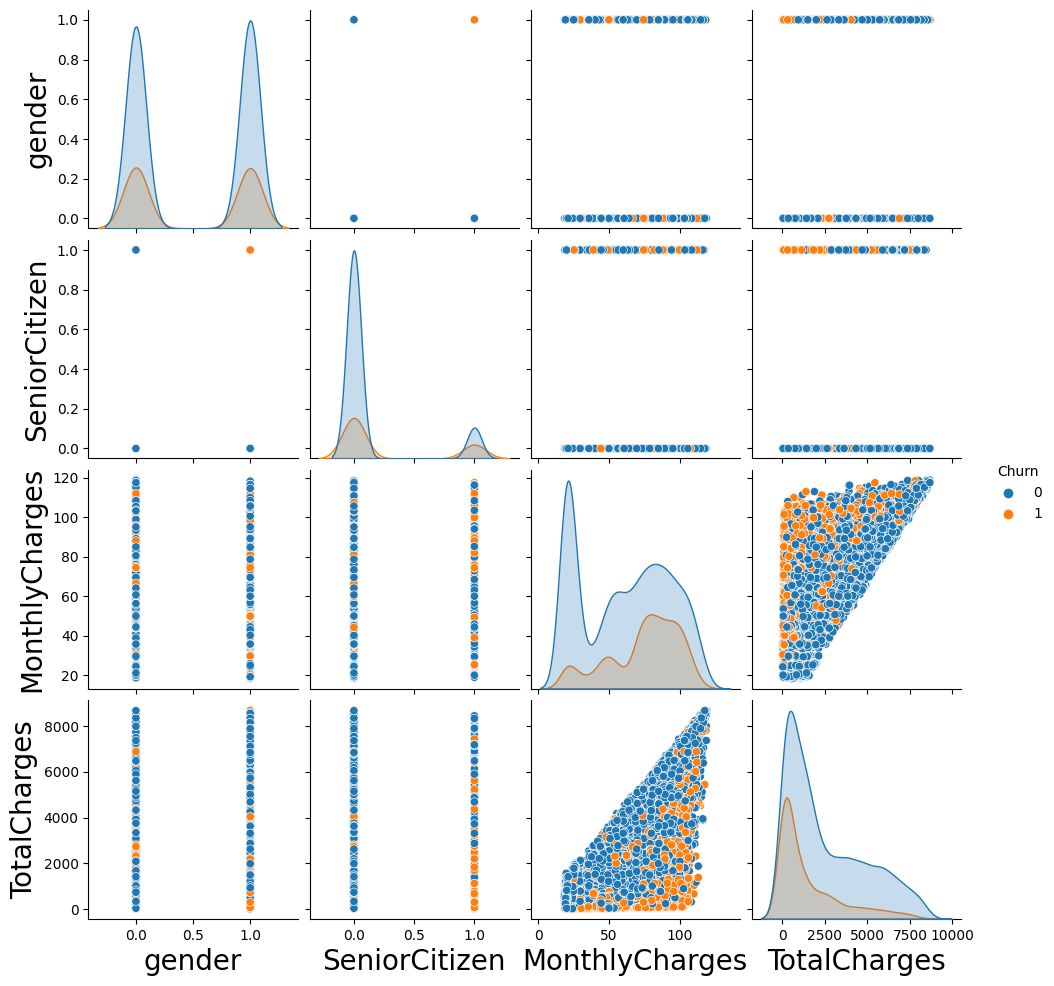

In [42]:
df2.gender=df2.gender.replace({"Female": 0, "Male":1})                #Converting gender column into numeric form
cols_plot=["gender", "SeniorCitizen","MonthlyCharges", "TotalCharges","Churn"]
pp=sns.pairplot(df2[cols_plot], diag_kind='kde', hue="Churn")            #Visualising Churners & non-churners

We can observe that the data is biased wrt number of Churners. But, is unbiased in terms of gender stand alone.

# CONCLUSION

Payment method- Electronic check are highest churners.                                                                         
No TechSupport are highest churners.                                                                                           
Non-Senior citizens are highest churners.                                                                                       
Monthly contract customers are highest churners as they can leave whenever they wish to with minimum loss.                     

In [43]:
df2_dummies.to_csv("customer_churn.csv")